<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/SpectralFitHPGe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High-Purity Germanium (HPGe)

In questo notebook analizziamo i dati presi in alcune acquisizioni di spettroscopia effettuate con un rivelatore a germanio.

Scaricheremo 1 file di testo contenente il tempo di acquisizione ove sta scritto "$MEAS_TIM" ed i valori dell'istogramma in ADC dei conteggi osservati.


In [2]:
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_open.Spe

--2025-03-05 13:46:20--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_open.Spe
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164264 (160K) [text/plain]
Saving to: ‘fondo_open.Spe’

fondo_open.Spe      100%[===================>] 160.41K  --.-KB/s    in 0.1s    

2025-03-05 13:46:21 (1.26 MB/s) - ‘fondo_open.Spe’ saved [164264/164264]



In [12]:
!pip install iminuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 5.7 MB/s eta 0:00:00


In [13]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size = 16)

from iminuit import Minuit
from iminuit.cost import LeastSquares

files = glob.glob("*.Spe")
print("File a disposizione:", files)

class Acq ():

    def __init__(self, filename = None):
        self.filename = filename
        self.adc = None
        self.energy = None
        self.counts, self.counts_err = None, None
        self.time = None
        if filename is not None:
            self.read()
        return

    def read(self):
        self.counts = np.loadtxt(self.filename, unpack = True, skiprows = 12, max_rows = 8191)
        self.adc = np.arange(len(self.counts))
        self.bin_edges = np.arange(-0.5, len(self.counts)+0.5, 1)
        self.time = np.loadtxt(self.filename, skiprows = 9, max_rows = 1)[1]
        self.counts_err = np.sqrt(self.counts)
        self.rate = self.counts / self.time
        self.rate_err = self.counts_err / self.time
        return

File a disposizione: ['fondo_open.Spe']


In [4]:
data = Acq("fondo_open.Spe")

In [5]:
data.counts

array([0., 0., 0., ..., 8., 6., 4.])

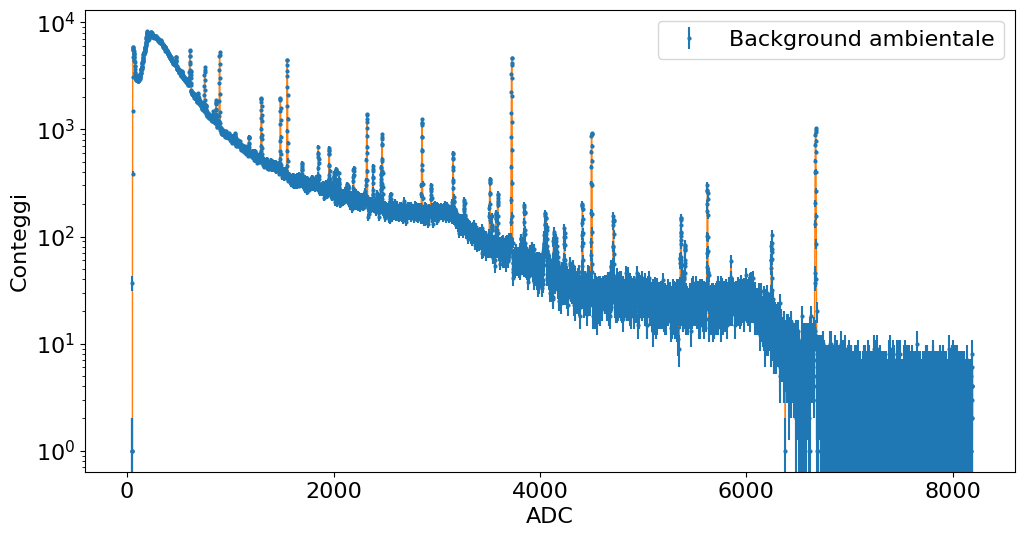

In [33]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.errorbar(x = data.adc, y = data.counts, yerr = data.counts_err, ls = "None", marker = "o", ms = 2, label = "Background ambientale")
ax.stairs(data.counts, data.bin_edges)
ax.set_yscale("log")
ax.set_xlabel("ADC")
ax.set_ylabel("Conteggi")
ax.legend();

(500.0, 1000.0)

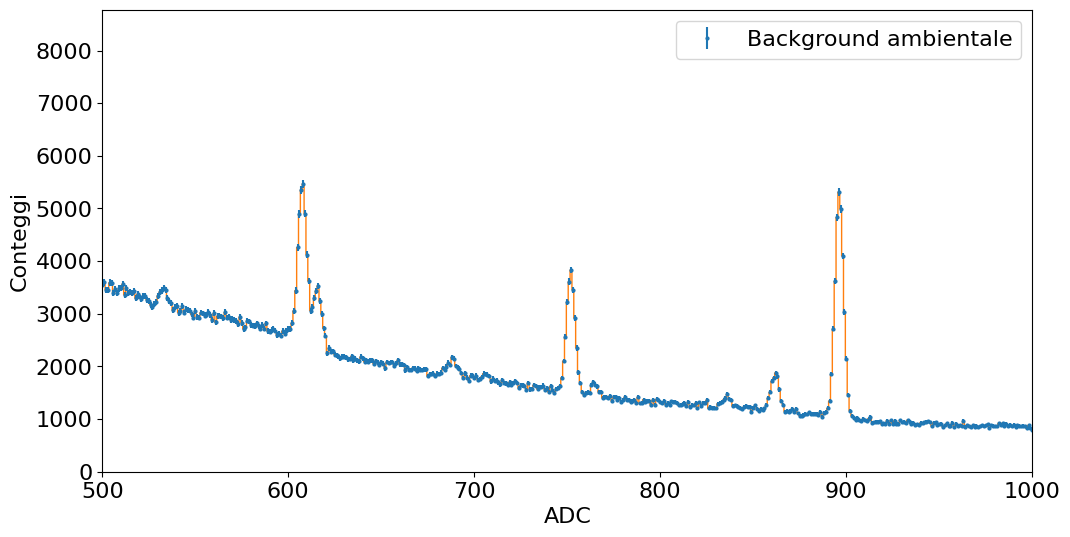

In [35]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.errorbar(x = data.adc, y = data.counts, yerr = data.counts_err, ls = "None", marker = "o", ms = 2, label = "Background ambientale")
ax.stairs(data.counts, data.bin_edges)
#ax.set_yscale("log")
ax.set_xlabel("ADC")
ax.set_ylabel("Conteggi")
ax.legend()
ax.set_xlim(500, 1000)

Text(0, 0.5, 'ADC Peak')

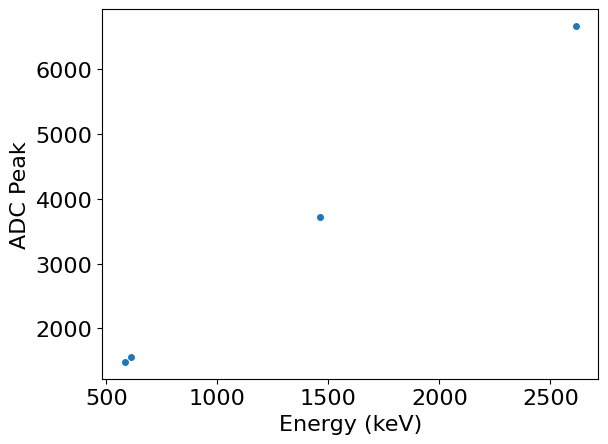

In [19]:
adc_peaks = [1484, 1552, 3727, 6671]
energy_peaks = [583, 609, 1460, 2614]
adc_peaks_err = [2, 2, 2, 2]

plt.errorbar(energy_peaks, adc_peaks, yerr = adc_peaks_err, ls = "None", marker = "o", ms = 4)
plt.xlabel("Energy (keV)")
plt.ylabel("ADC Peak")

In [20]:
def linear(x, p0, p1):
  return p0 + p1*x

lsq = LeastSquares(x=energy_peaks, y=adc_peaks, yerror = adc_peaks_err, model = linear)
m = Minuit(lsq, p0 = 0, p1 = 1)
m.migrad()
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.736 (χ²/ndof = 0.9)      │              Nfcn = 54               │
│ EDM = 2.37e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p0   │   -3.4    │    1.9    │            │            │         │         │       │
│ 1 │ p1   │  2.5537   │  0.0012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────┐
│    │         p0         p1 │
├────┼───────────────────────┤
│ p0 │       3.53 -1.9202e-3 │
│ p1 │ -1.9202e-3   1.46e-06 │
└────┴───────────────────────┘

(6661.0, 6681.0)

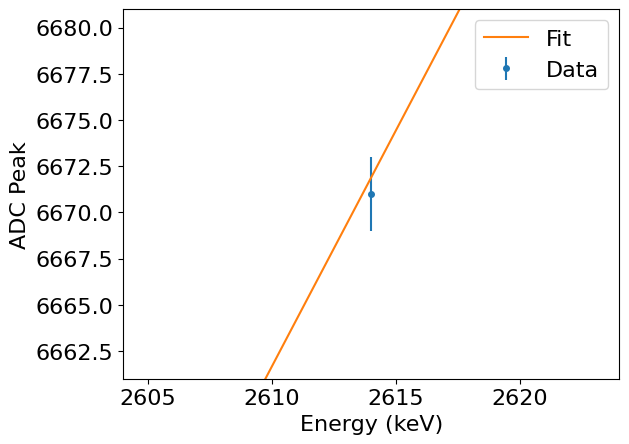

In [31]:
plt.errorbar(energy_peaks, adc_peaks, yerr = adc_peaks_err, ls = "None", marker = "o", ms = 4, label = "Data")
x = np.linspace(0, 2700)
y = linear(x, *m.values)
plt.plot(x, y, label = "Fit")
plt.xlabel("Energy (keV)")
plt.ylabel("ADC Peak")
plt.legend();

# Zoom sui primi due picchi
plt.xlim(570, 620)
plt.ylim(1460, 1560)

#
plt.xlim(1460 -10, 1460 +10)
plt.ylim(3727 -10, 3727 +10)

plt.xlim(2614 -10, 2614 +10)
plt.ylim(6671 -10, 6671 +10)